In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
# melihat jumlah data training
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# melihat jumlah data testing
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers
network = models.Sequential()
# input 28 x 28
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) #ada 512 titik unit (hidden layer)
network.add(layers.Dense(10, activation='softmax')) # dihubungkan ke 10 titik, karena ada 10 kelas (angka 0-9)
# fungsi aktivasi untuk menangkap non-linearitas, aktivasi 'relu' dan 'softmax', softmax untuk menghitung probability

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# kompilasi model
# loss function  yg digunakan adalah categorical cross entropy
# metrics = untuk melihat seberapa bagus model (akurasi)
# optimizer = memaksimalkan bobot
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# listing (persiapan data) -> mengkonversi data input menjadi 0-1 (dengan dibagi 255)
# imag2 8 bit, nilai maksimal 0-1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
# merubah data label ke jenis  kategori
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# training model = data image dan labelnya dipasangkan
# epoch untuk iterasi (mengooptimalkan untuk menemukan bobot yang pas)
# batch size = karena bobot yg disaring ada 400rb lebih, maka dilakukan teknik batch untuk pemrosesan per-batch
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3838 - accuracy: 0.8919
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3709 - accuracy: 0.8954
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3607 - accuracy: 0.8981
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3515 - accuracy: 0.9000
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.3436 - accuracy: 0.9017


In [18]:
# menguji model yang sudah disaring ke data uji
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.9084


Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2484 - accuracy: 0.9289
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2451 - accuracy: 0.9295
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2415 - accuracy: 0.9311
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2378 - accuracy: 0.9323
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2343 - accuracy: 0.9333
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2310 - accuracy: 0.9338
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2277 - accuracy: 0.9352
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2242 - accuracy: 0.9358
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2212 - accuracy: 0.9370
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2178 - accuracy:

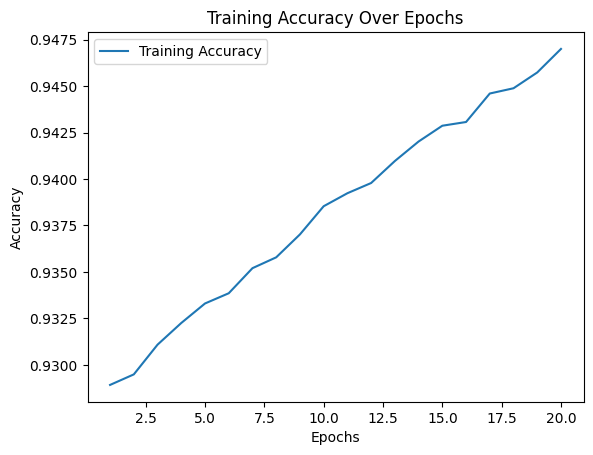

In [20]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have a model named 'network' and training data 'train_images', 'train_labels'
history = network.fit(train_images, train_labels, epochs=20, batch_size=128)

# Extracting training accuracy from the history object
train_accuracy = history.history['accuracy']

# Creating x-axis values (epochs)
epochs = np.arange(1, 21)

# Plotting the training accuracy over epochs
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()